In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from matplotlib import pyplot
import seaborn as sns

import itertools

from sklearn.ensemble import RandomForestClassifier

In [93]:
df = pd.read_csv("text_complexity_features.csv")
y = np.array(df["#label"])
X = df.drop(["#id", "#label"],  axis='columns')

In [94]:
column_names = list(df.columns.values)
column_names

['#label',
 '#id',
 'sentence_length',
 'characters_per_word',
 'syllables_per_word',
 'text_length',
 'noun_phrases_per_sent',
 'tree_height',
 'sub_clauses_per_sent',
 'sents_with_verb_as_root',
 'sents_with_nouns_as_root',
 'POS_verbs',
 'POS_aux_verbs',
 'POS_nouns',
 'POS_adjectives',
 'POS_punctuations',
 'POS_determiners',
 'POS_pronouns',
 'POS_conjunctions',
 'POS_numerales',
 'POS_adpositions',
 'ttr',
 'lexical_complexity_score',
 'verbs_in_sentence',
 'pronouns_per_sentence',
 'articles_per_sentence',
 'semantic_similarity_nouns',
 'semantic_similarity_verbs',
 'semantic_similarity_adjectives\r\n']

In [81]:
miniklexi_data = df.loc[df["#label"] == 0.0].drop(["#id", "#label"],  axis='columns')
klexikon_data = df.loc[df["#label"] == 0.5].drop(["#id", "#label"],  axis='columns')
wiki_data = df.loc[df["#label"] == 1.0].drop(["#id", "#label"],  axis='columns')

In [90]:
#miniklexi_data.hist(figsize=(25,20))

# Baseline Features

In [119]:
baseline_df = df[["#label", "sentence_length", "characters_per_word", "syllables_per_word", "text_length"]]
baseline_miniklexi = baseline_df.loc[df["#label"] == 0.0]
baseline_klexikon = baseline_df.loc[df["#label"] == 0.5]
baseline_wiki = baseline_df.loc[df["#label"] == 1.0]

In [120]:
baseline_df

,#label,sentence_length,characters_per_word,syllables_per_word,text_length
0,0.0,7.285714,4.862745,1.627451,102
1,0.0,8.090909,4.494382,1.539326,89
2,0.0,7.187500,4.521739,1.634783,115
3,0.0,7.200000,5.000000,1.743056,144
4,0.0,6.235294,5.132075,1.877358,106
...,...,...,...,...,...
880,1.0,16.461538,6.448598,2.378505,214
881,1.0,15.400000,6.172078,2.126623,308
882,1.0,15.750000,5.904762,2.126984,63
883,1.0,15.750000,6.688889,2.485714,315


array([[<AxesSubplot:title={'center':'sentence_length'}>,
        <AxesSubplot:title={'center':'characters_per_word'}>],
       [<AxesSubplot:title={'center':'syllables_per_word'}>,
        <AxesSubplot:title={'center':'text_length'}>]], dtype=object)

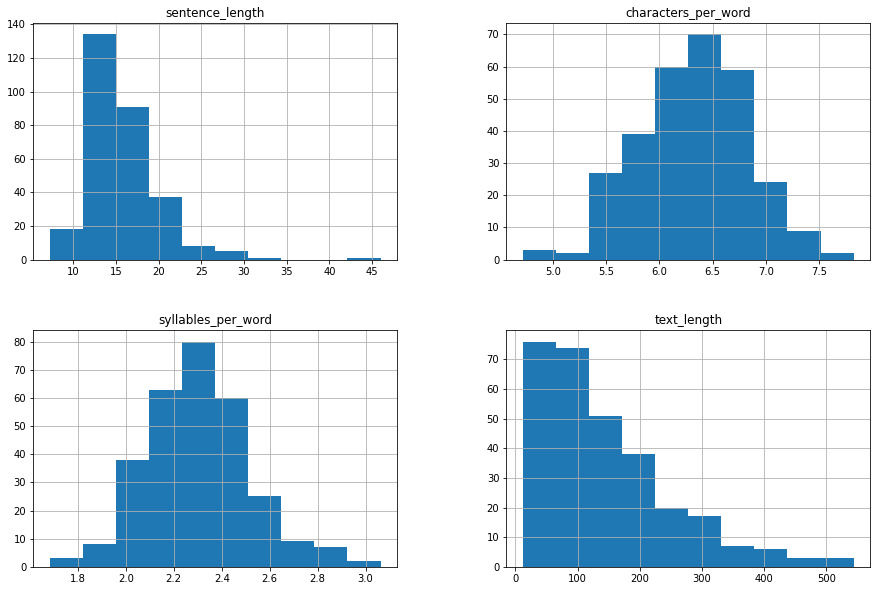

In [104]:
baseline_wiki.hist(figsize=(15,10))

array([[<AxesSubplot:title={'center':'sentence_length'}>,
        <AxesSubplot:title={'center':'characters_per_word'}>],
       [<AxesSubplot:title={'center':'syllables_per_word'}>,
        <AxesSubplot:title={'center':'text_length'}>]], dtype=object)

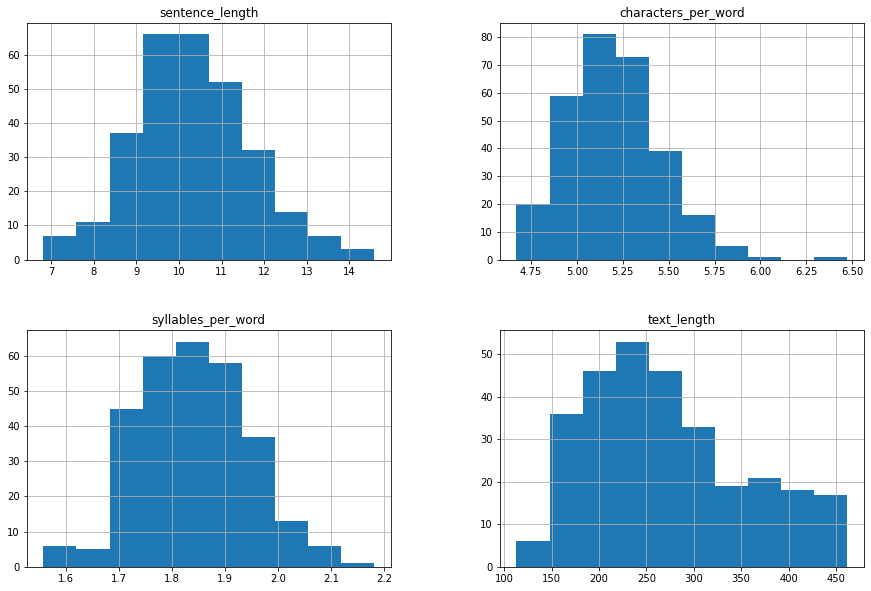

In [101]:
baseline_klexikon.hist(figsize=(15,10))

array([[<AxesSubplot:title={'center':'sentence_length'}>,
        <AxesSubplot:title={'center':'characters_per_word'}>],
       [<AxesSubplot:title={'center':'syllables_per_word'}>,
        <AxesSubplot:title={'center':'text_length'}>]], dtype=object)

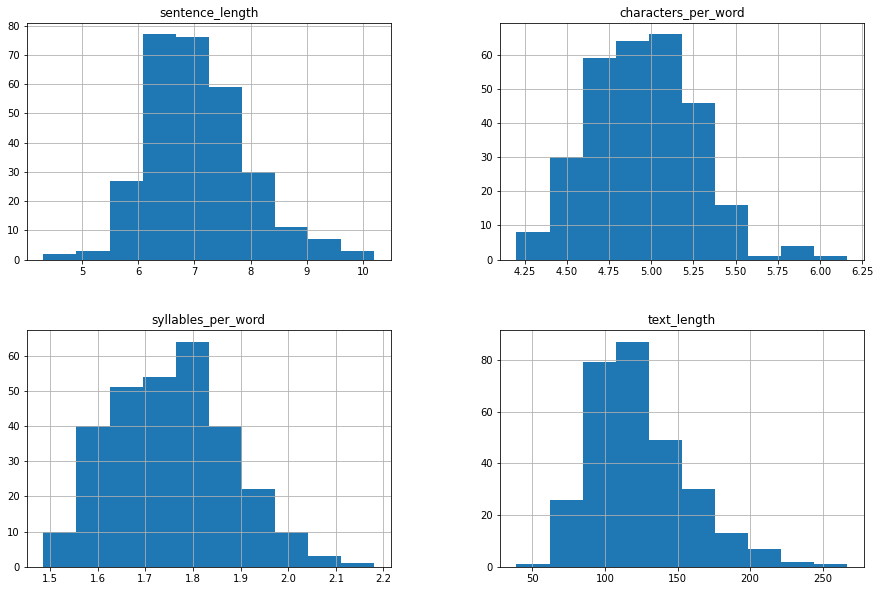

In [105]:
baseline_miniklexi.hist(figsize=(15,10))

<AxesSubplot:xlabel='syllables_per_word', ylabel='Count'>

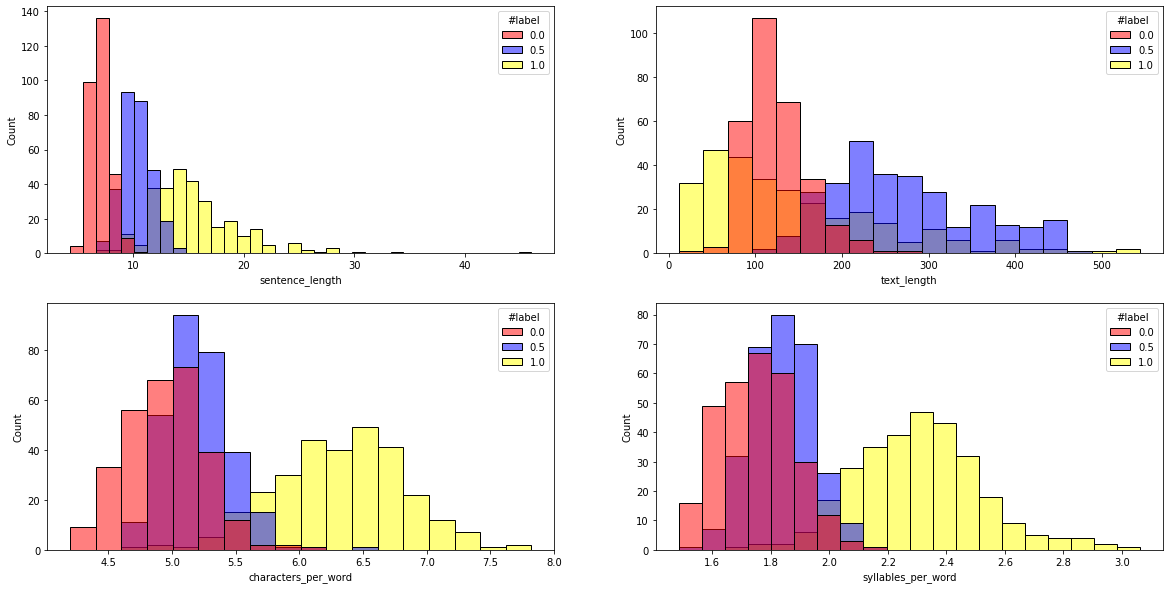

In [144]:
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(20, 10))
sns.histplot(ax=axes[0, 0], data=baseline_df, x="sentence_length", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[0, 1], data=baseline_df, x="text_length", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 0], data=baseline_df, x="characters_per_word", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 1], data=baseline_df, x="syllables_per_word", hue="#label", palette=["red", "blue", "yellow"])

# Syntactic Features

In [147]:
syntactic_df = df[["#label", "noun_phrases_per_sent", "tree_height", "sub_clauses_per_sent", "sents_with_verb_as_root", "sents_with_nouns_as_root", "sentence_length"]]
syntactic_miniklexi = syntactic_df.loc[df["#label"] == 0.0]
syntactic_klexikon = syntactic_df.loc[df["#label"] == 0.5]
syntactic_wiki = syntactic_df.loc[df["#label"] == 1.0]


<AxesSubplot:xlabel='sentence_length', ylabel='Count'>

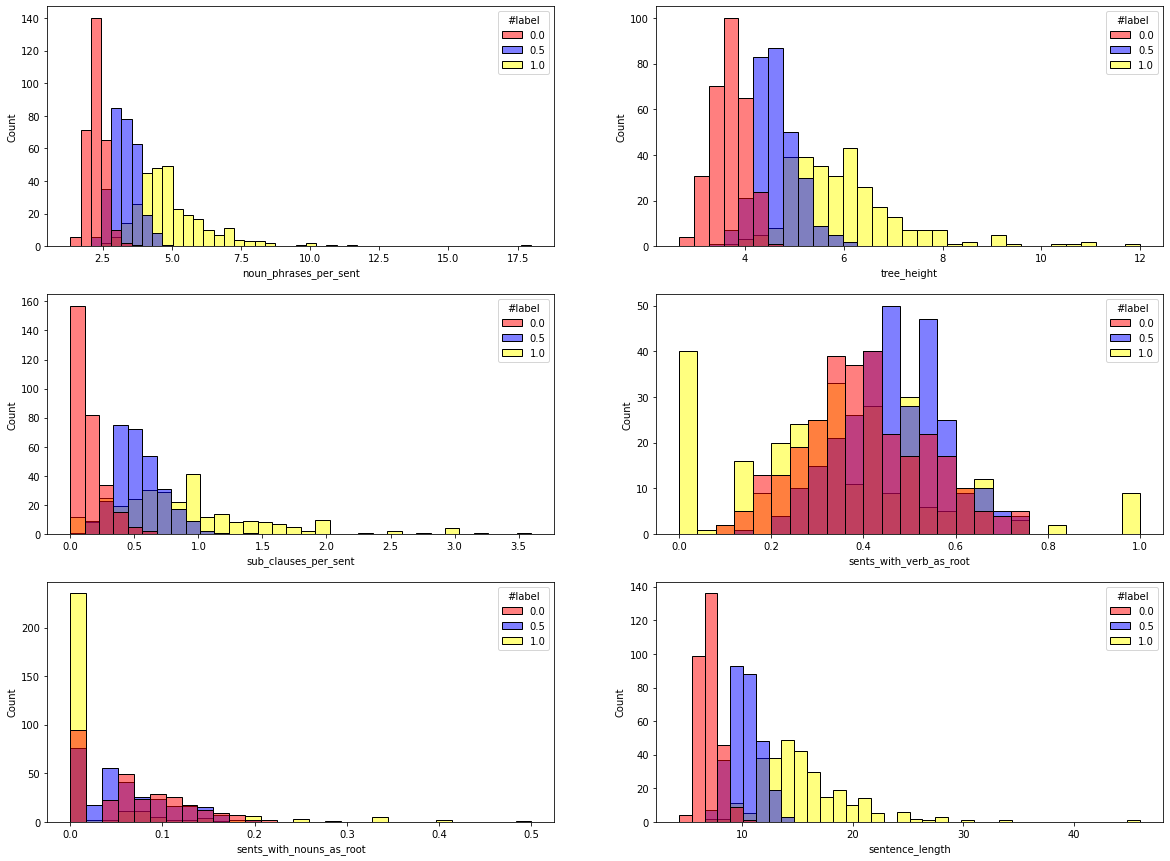

In [149]:
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize=(20, 15))
sns.histplot(ax=axes[0, 0], data=syntactic_df, x="noun_phrases_per_sent", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[0, 1], data=syntactic_df, x="tree_height", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 0], data=syntactic_df, x="sub_clauses_per_sent", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 1], data=syntactic_df, x="sents_with_verb_as_root", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 0], data=syntactic_df, x="sents_with_nouns_as_root", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 1], data=syntactic_df, x="sentence_length", hue="#label", palette=["red", "blue", "yellow"])

# POS tag Features

In [150]:
pos_df = df[["#label", "POS_verbs", "POS_aux_verbs", "POS_nouns", "POS_adjectives", "POS_punctuations", "POS_determiners"
            , "POS_pronouns", "POS_conjunctions", "POS_numerales", "POS_adpositions"]]
pos_miniklexi = pos_df.loc[df["#label"] == 0.0]
pos_klexikon = pos_df.loc[df["#label"] == 0.5]
pos_wiki = pos_df.loc[df["#label"] == 1.0]

<AxesSubplot:xlabel='POS_adpositions', ylabel='Count'>

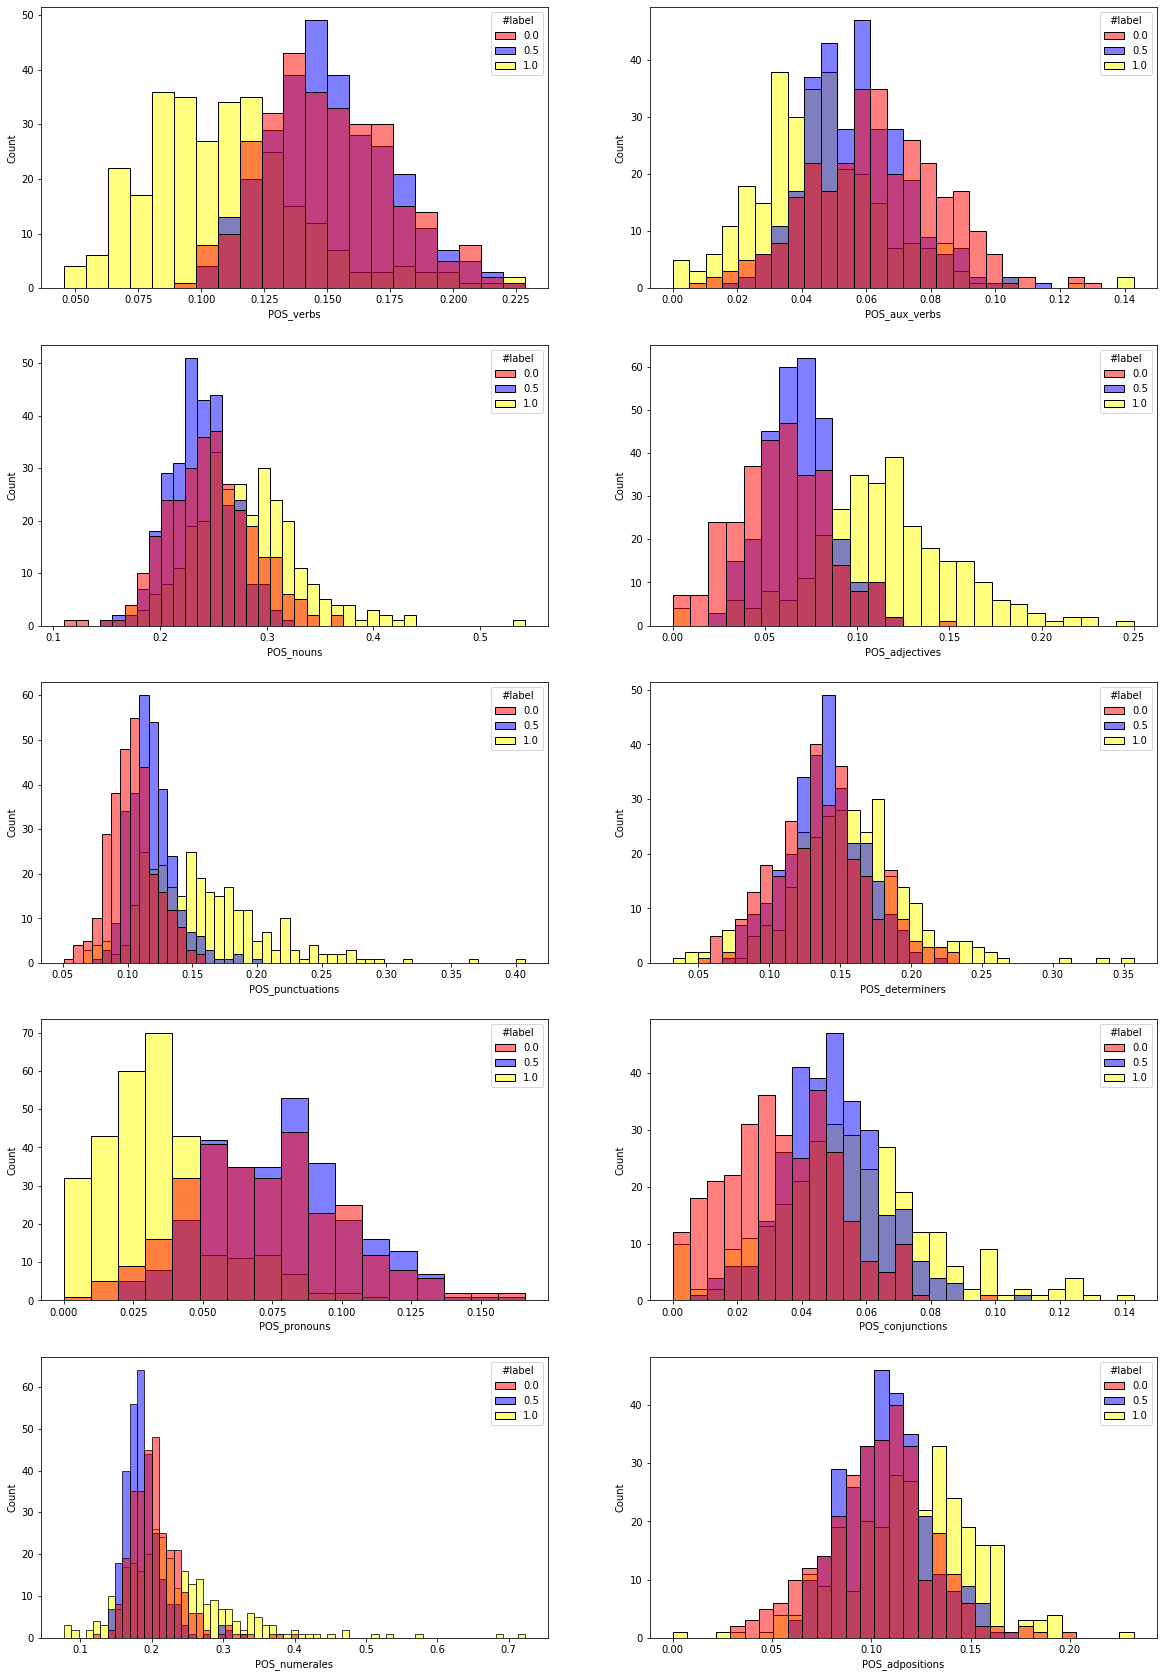

In [152]:
fig, axes = plt.subplots(nrows=5, ncols = 2, figsize=(20, 30))
sns.histplot(ax=axes[0, 0], data=pos_df, x="POS_verbs", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[0, 1], data=pos_df, x="POS_aux_verbs", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 0], data=pos_df, x="POS_nouns", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 1], data=pos_df, x="POS_adjectives", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 0], data=pos_df, x="POS_punctuations", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 1], data=pos_df, x="POS_determiners", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[3, 0], data=pos_df, x="POS_pronouns", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[3, 1], data=pos_df, x="POS_conjunctions", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[4, 0], data=pos_df, x="POS_numerales", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[4, 1], data=pos_df, x="POS_adpositions", hue="#label", palette=["red", "blue", "yellow"])

### Most Interessting Distributions (POS)

<AxesSubplot:xlabel='POS_conjunctions', ylabel='Count'>

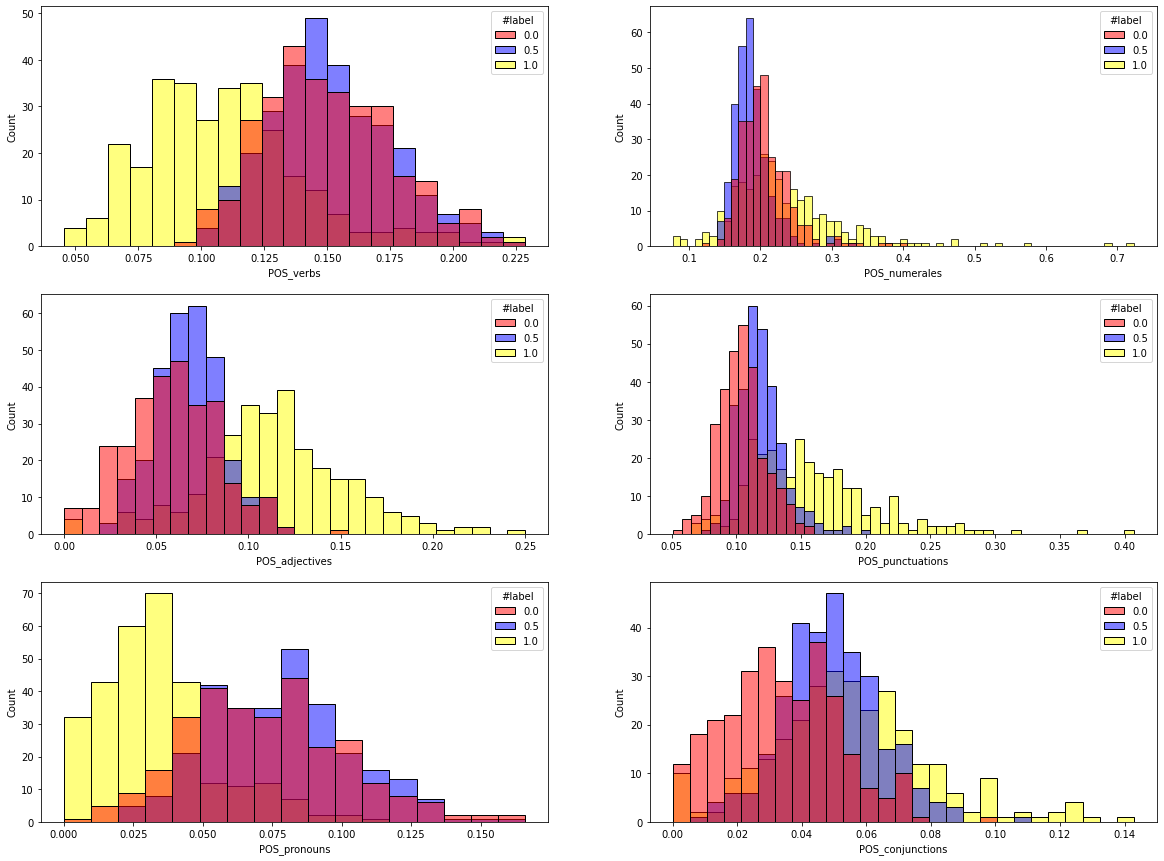

In [158]:
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize=(20, 15))
sns.histplot(ax=axes[0, 0], data=pos_df, x="POS_verbs", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[0, 1], data=pos_df, x="POS_numerales", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 0], data=pos_df, x="POS_adjectives", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1, 1], data=pos_df, x="POS_punctuations", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 0], data=pos_df, x="POS_pronouns", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2, 1], data=pos_df, x="POS_conjunctions", hue="#label", palette=["red", "blue", "yellow"])

# Lexical Features

In [161]:
lexical_df = df[["#label", "ttr", "lexical_complexity_score"]]
pos_miniklexi = lexical_df.loc[df["#label"] == 0.0]
pos_klexikon = lexical_df.loc[df["#label"] == 0.5]
pos_wiki = lexical_df.loc[df["#label"] == 1.0]

<AxesSubplot:xlabel='lexical_complexity_score', ylabel='Count'>

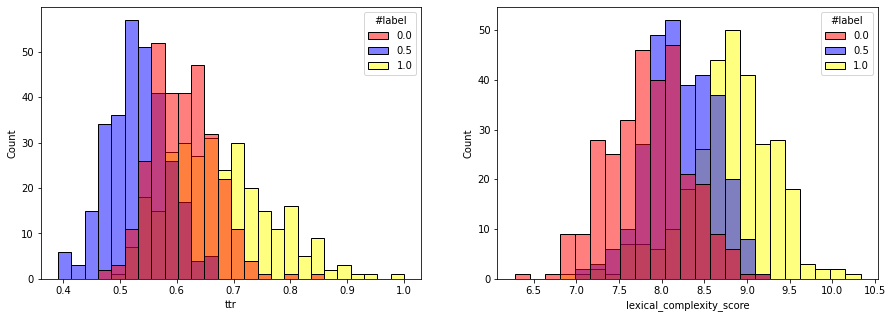

In [171]:
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(15, 5))
sns.histplot(ax=axes[0], data=lexical_df, x="ttr", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1], data=lexical_df, x="lexical_complexity_score", hue="#label", palette=["red", "blue", "yellow"])

# Verb Tense

In [174]:
tense_df = df[["#label", "verbs_in_sentence"]]
pos_miniklexi = tense_df.loc[df["#label"] == 0.0]
pos_klexikon = tense_df.loc[df["#label"] == 0.5]
pos_wiki = tense_df.loc[df["#label"] == 1.0]

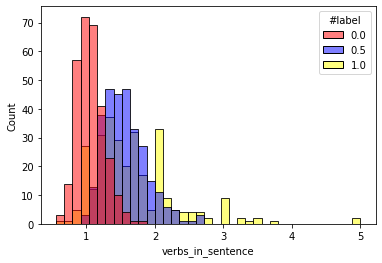

In [178]:
x = sns.histplot(data=tense_df, x="verbs_in_sentence", hue="#label", palette=["red", "blue", "yellow"])

# Discourse Features

In [179]:
discourse_df = df[["#label", "pronouns_per_sentence", "articles_per_sentence"]]
pos_miniklexi = discourse_df.loc[df["#label"] == 0.0]
pos_klexikon = discourse_df.loc[df["#label"] == 0.5]
pos_wiki = discourse_df.loc[df["#label"] == 1.0]

<AxesSubplot:xlabel='articles_per_sentence', ylabel='Count'>

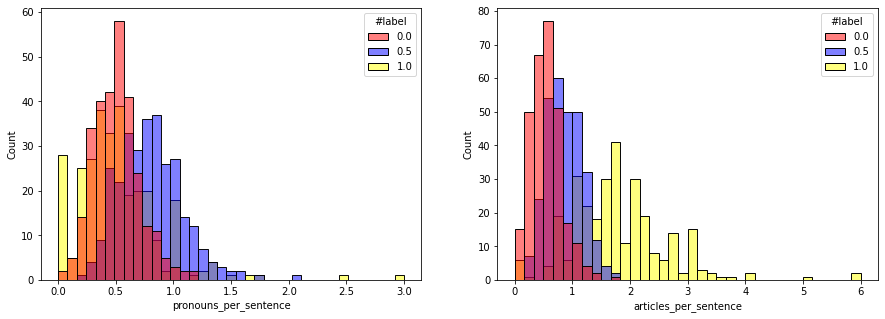

In [180]:
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(15, 5))
sns.histplot(ax=axes[0], data=discourse_df, x="pronouns_per_sentence", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1], data=discourse_df, x="articles_per_sentence", hue="#label", palette=["red", "blue", "yellow"])

# Semantic Similarity Features

In [182]:
sem_sim_df = df[["#label", "semantic_similarity_nouns", "semantic_similarity_verbs", "semantic_similarity_adjectives\r\n"]]
pos_miniklexi = sem_sim_df.loc[df["#label"] == 0.0]
pos_klexikon = sem_sim_df.loc[df["#label"] == 0.5]
pos_wiki = sem_sim_df.loc[df["#label"] == 1.0]

<AxesSubplot:xlabel='semantic_similarity_adjectives\r\n', ylabel='Count'>

c:\users\daniela weiß\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\daniela weiß\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


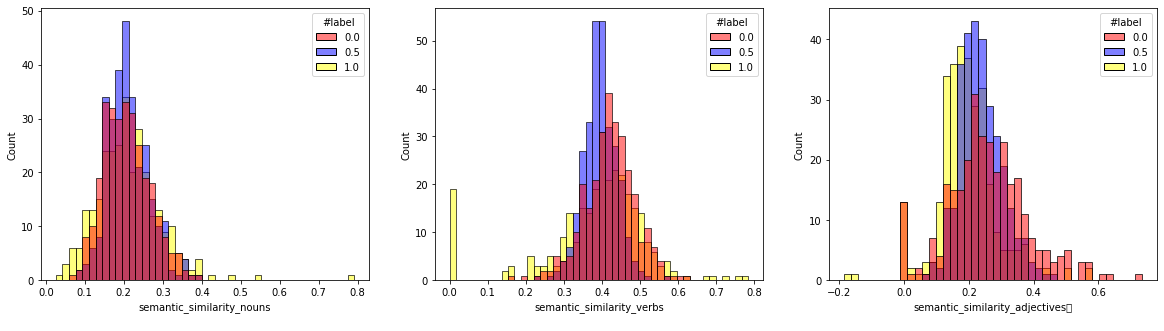

In [189]:
fig, axes = plt.subplots(nrows=1, ncols = 3, figsize=(20, 5))
sns.histplot(ax=axes[0], data=sem_sim_df, x="semantic_similarity_nouns", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[1], data=sem_sim_df, x="semantic_similarity_verbs", hue="#label", palette=["red", "blue", "yellow"])
sns.histplot(ax=axes[2], data=sem_sim_df, x="semantic_similarity_adjectives\r\n", hue="#label", palette=["red", "blue", "yellow"])

# Inter-Feature Relations

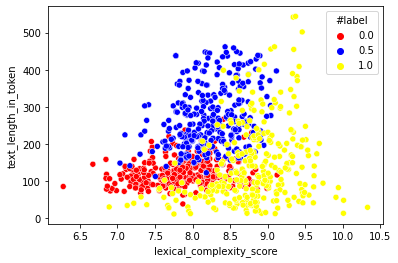

In [12]:
a = sns.scatterplot(data=df, hue="#label", x="lexical_complexity_score", y="text_length_in_token", palette=["red", "blue", "yellow"])

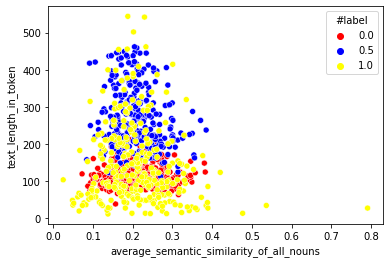

In [14]:
b = sns.scatterplot(data=df, hue="#label", x="average_semantic_similarity_of_all_nouns", y="text_length_in_token", palette=["red", "blue", "yellow"])

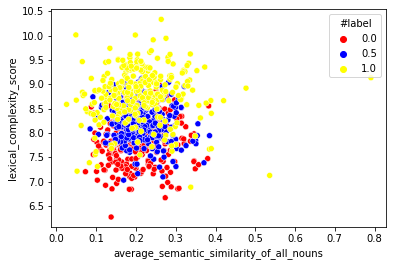

In [16]:
c = sns.scatterplot(data=df, hue="#label", x="average_semantic_similarity_of_all_nouns", y="lexical_complexity_score", palette=["red", "blue", "yellow"])

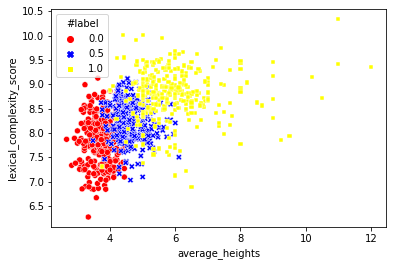

In [36]:
d = sns.scatterplot(data=df, hue="#label", x="average_heights", y="lexical_complexity_score",  
                    palette=["red", "blue", "yellow"], 
                    style="#label")

In [53]:

map_lab = {1.0: 3, 0.5:2, 0.0:1}
y_int = np.array([map_lab[x] for x in y])
data = df.drop(["#id","#label"],  axis='columns')

<AxesSubplot:title={'center':'Feature Importances'}>

c:\users\daniela weiß\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\daniela weiß\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


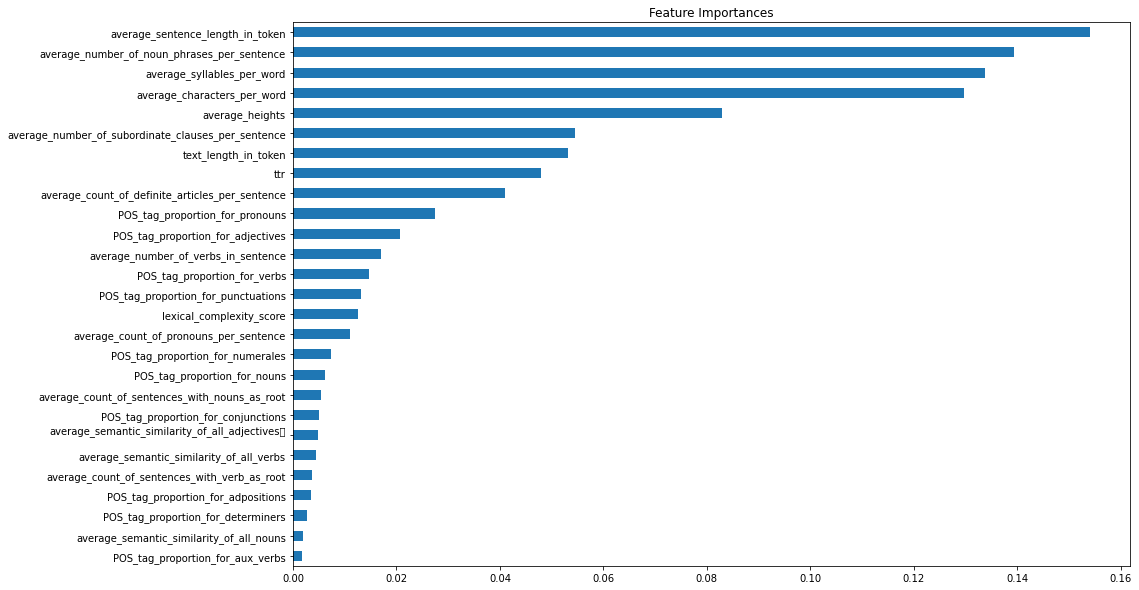

In [56]:
model = RandomForestClassifier()
model.fit(X, y_int)

importances = model.feature_importances_
features = data.columns

feat_importances = pd.Series(importances, index=features)
feat_importances = feat_importances.sort_values()
    
plt.figure(figsize=(15, 10)) 
plt.title('Feature Importances')
feat_importances.plot(kind='barh')

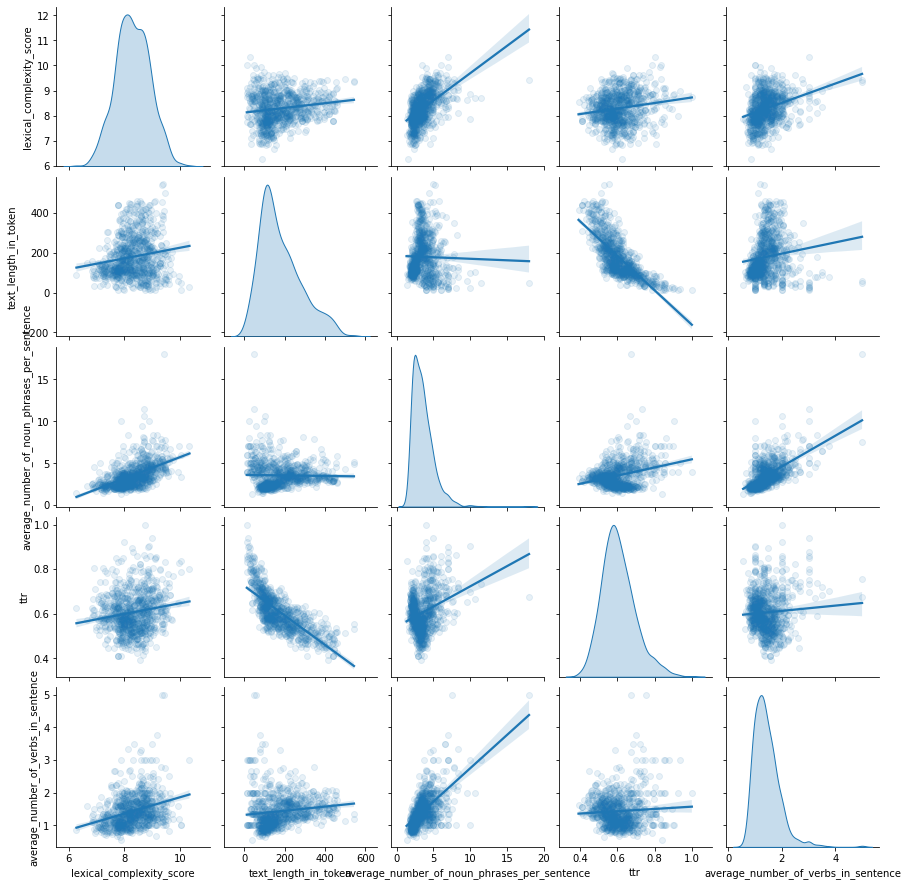

In [62]:
X.insert(0, "text_complexity", y)
_ = sns.pairplot(
    X[["lexical_complexity_score", 'text_length_in_token', 'average_number_of_noun_phrases_per_sentence', 
       'ttr', 'average_number_of_verbs_in_sentence']],
    kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}})